In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time 
from statistics import mean

In [2]:
train = pd.read_csv("../input/intro2ml-kpfu-1/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
h_sales= train[['SalePrice','LotArea','LotFrontage','1stFlrSF','OverallQual','GarageArea','YearBuilt','TotalBsmtSF','2ndFlrSF',]].fillna (0)
h_sales.head()

,SalePrice,LotArea,LotFrontage,1stFlrSF,OverallQual,GarageArea,YearBuilt,TotalBsmtSF,2ndFlrSF
0,208500,8450,65.0,856,7,548,2003,856,854
1,181500,9600,80.0,1262,6,460,1976,1262,0
2,223500,11250,68.0,920,7,608,2001,920,866
3,140000,9550,60.0,961,7,642,1915,756,756
4,250000,14260,84.0,1145,8,836,2000,1145,1053


In [4]:
n = len(h_sales)
# n - количество объектов
m = len(h_sales.drop('SalePrice', axis=1).columns)
# m - количество признаков(колонок)
y = h_sales['SalePrice'].values.reshape((n, 1)) #транспонируем строку(массив) с ценами
X = h_sales.drop('SalePrice',  axis=1).values.reshape((n, m))
X

array([[ 8450.,    65.,   856., ...,  2003.,   856.,   854.],
       [ 9600.,    80.,  1262., ...,  1976.,  1262.,     0.],
       [11250.,    68.,   920., ...,  2001.,   920.,   866.],
       ...,
       [ 9042.,    66.,  1188., ...,  1941.,  1152.,  1152.],
       [ 9717.,    68.,  1078., ...,  1950.,  1078.,     0.],
       [ 9937.,    75.,  1256., ...,  1965.,  1256.,     0.]])

In [5]:
X = np.hstack((np.ones((n, 1)), X)) #расширим матрицу признаков сложив с единичной

In [6]:
def compute_loss(y, tx, w, flag=0):
    """Функция потерь
    """
    # w = [1, 2].transpose()

    e = y -np.dot(tx, w)

    if(flag == 0):
        loss_result_mse = 0.5 * np.mean(e**2) #квадратичная 
        return loss_result_mse
    
    else:
        loss_result_mae = 0.5 * np.mean(np.abs(e)) #по модулю
        return loss_result_mae

In [7]:
def compute_gradient(y, tx, w):
    """Вычислить градиент."""
    
    
    e = y - np.dot(tx, w)
    #print(e)
    N = np.shape(y)[0]
    
    # Среднеквадратическая ошибка
    gradient_mse = (-1/N) * np.dot(tx.T, e)
    return gradient_mse
    
    '''
    # Средняя абсолютная ошибка
    gradient_mae = (-1/N) * np.dot(tx.T, e)
    return gradient_mae
    '''

In [8]:
def gradient_descent_m(y, tx, initial_w, max_iters, gamma, moment):
    """Алгоритм градиентного спуска."""
    
    ws = [initial_w]
    losses = []
    w = initial_w
    global_epsilon = 0.18*1e10 
    iterat = 0
    #1 iter
    tv_grad = compute_gradient(y, tx, w)
    
    
    for n_iter in range(0,max_iters):
        
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        tv = moment*tv_grad +(1-moment)*grad 
        w = w - gamma *tv   #обновляем веса
        tv_grad = compute_gradient(y, tx, w)
        # сохраняем w and loss
        ws.append(w)
        losses.append(loss)
        if(abs(losses[n_iter]) <= global_epsilon):
            iterat = n_iter
#             break
#         print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
#                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
#     print(iterat)
    return losses, ws[iterat-1]

In [9]:
theta_0 = np.zeros((m + 1, 1))
loss_history_moment, theta_best_moment= gradient_descent_m(y, X, theta_0,gamma=1e-10, max_iters= 100000, moment = 0.9)

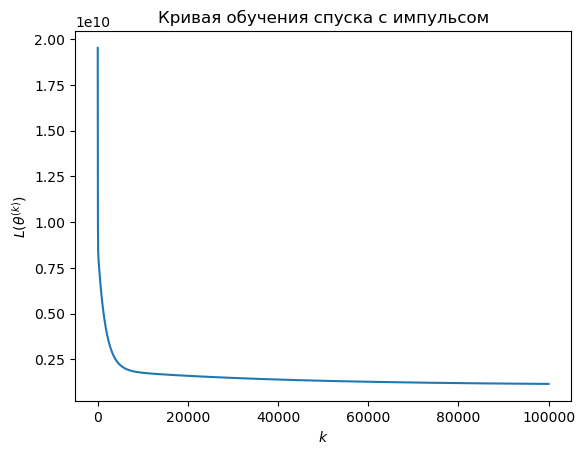

In [10]:
plt.plot(loss_history_moment)
plt.xlabel('$k$')
plt.ylabel('$L(\\theta^{(k)})$')
_ = plt.title('Кривая обучения спуска с импульсом')

In [11]:
compute_loss(y, X, theta_best_moment)

1154613176.6037338

In [12]:
test = pd.read_csv("../input/intro2ml-kpfu-1/test.csv")
h_testfirst= test[['Id','LotArea','LotFrontage','1stFlrSF','OverallQual','GarageArea','YearBuilt','TotalBsmtSF','2ndFlrSF']].fillna (0)
h_test= test[['LotArea','LotFrontage','1stFlrSF','OverallQual','GarageArea','YearBuilt','TotalBsmtSF','2ndFlrSF']].fillna (0)
h_test.head()

,LotArea,LotFrontage,1stFlrSF,OverallQual,GarageArea,YearBuilt,TotalBsmtSF,2ndFlrSF
0,11622,80.0,896,5,730.0,1961,882.0,0
1,14267,81.0,1329,6,312.0,1958,1329.0,0
2,13830,74.0,928,5,482.0,1997,928.0,701
3,9978,78.0,926,6,470.0,1998,926.0,678
4,5005,43.0,1280,8,506.0,1992,1280.0,0


In [13]:
n_test = len(h_test)
# n - количество объектов
m_test = len(h_test.columns)
# m - количество признаков(колонок)
X_test = h_test.values.reshape((n_test, m_test)) #нам тестовый набор для проверки обученной модели
X_test = np.hstack((np.ones((n_test, 1)), X_test)) #расширим матрицу признаков сложив с единичной

In [14]:
Y_test = X_test.dot(theta_best_moment) # Предсказание на тренировочных данных 
len(Y_test)

Y_test = np.array(Y_test)
Y_test= Y_test.flatten().tolist ()
Y_test = np.array(Y_test)
Y_test

array([150151.5414486 , 179936.46352326, 185837.61910823, ...,
       182932.78285493, 122361.2768145 , 217053.99250904])

In [15]:
solution = pd.DataFrame({"id":h_testfirst['Id'].values, "SalePrice":Y_test})
solution

,id,SalePrice
0,1461,150151.541449
1,1462,179936.463523
2,1463,185837.619108
3,1464,182212.737976
4,1465,179975.865732
...,...,...
1454,2915,108465.187253
1455,2916,121397.884054
1456,2917,182932.782855
1457,2918,122361.276815


In [16]:
solution.to_csv("submission.csv", index = False)